Web scrapping for IPL match analytics

In [ ]:
import pandas as pd

C:\Users\shrey\AppData\Local\Temp\ipykernel_548\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
                #WEB SCRAPPING FOR IPL MATCH ANALYTICS

#importing webdriver, keys, by and options from selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time    #importing time for browser to get sleep within specific time
import pandas as pd  #pandas will be helpful to create dataframe to get exported to csv


#creating empty array list as per the data description
s = []
mn = []
v = []
dt=[]
mw=[]
ft=[]
st=[]
lnk=[]

#Selecting driver as chrome
driver = webdriver.Chrome()

#We have to scrap data for all the seasons so applying loop in the url link to acess all the seasons from 2008 till 2023
for i in range(2008,2024,1):
    #selecting ipl browser url and using f string to navigate through different ipl seasons
    driver.get(f'https://www.iplt20.com/matches/results/{i}')     #
    time.sleep(1)

    #scrapping the webpage using xpath in Selenium
    session = driver.find_element('xpath', "//div[@class='col-lg-2 col-md-2 col-sm-6'][3]/div/div[@class='cSBDisplay ng-binding']")
    match_no= driver.find_elements('xpath',"//div[@class='vn-schedule-head']/div/span[@class='vn-matchOrder ng-binding ng-scope']")
    venue=driver.find_elements("xpath", "//div[@class='w50 fl']/span/p")
    date_time= driver.find_elements("xpath", "//div[@class='w50 fl']/div")
    match_won=driver.find_elements("xpath","//div[@class=' w20 tl pr50']/div")
    first_team=driver.find_elements("xpath","//div[@class='vn-shedTeam']")
    second_team=driver.find_elements("xpath","//div[@class='vn-shedTeam vn-team-2']")
    link=driver.find_elements("xpath","//div[@class='vn-ticnbtn']/a")

    #applying nested loop to extract elements of the above data lists
    for j in range(59):
        s.append(session.text)    #session will be same for webpage and will change according to the navigated webpage

        #using try except to handle exceptions if needed
        #appending the extracted elements to the empty array lists respectively
        try:
            mn.append(match_no[j].text)

        except Exception:
            mn.append("unavailable")

        try:
            v.append(venue[j].text)
        except Exception:
            v.append("unavailable")

        try:
            dt.append(date_time[j].text)
        except Exception:
            dt.append("unavailable")

        try:
            mw.append(match_won[j].text)
        except Exception:
            mw.append("unavailable")

        try:
            ft.append(first_team[j].text)
        except Exception:
            ft.append("unavailable")

        try:
            st.append(second_team[j].text)
        except Exception:
            st.append("unavailable")

        try:
            lnk.append(link[j].get_attribute('href'))
        except Exception:
            lnk.append("unavailable")

#printing the appended lists and their lengths for reference
print(len(s),s)
print(len(mn),mn)
print(len(v), v)
print(len(dt), dt)
print(len(mw), mw)
print(len(ft),ft)
print(len(st),st)
print(len(lnk),lnk)

#creating a dictionary as variable 'd'
d={'Season_year':s, 'Match_number':mn, 'Venue':v, 'Date&Time':dt, 'Winning team': mw, 'First team': ft, 'Second team':st, 'link':lnk}

#creating a dataframe using pandas
df=pd.DataFrame(d)
print(df)

#finaly converting dataframe into dataset of csv format for further data analysis.
df.to_csv("ipl_scrap_dataset.csv",index=False)

944 ['SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', 'SEASON 2008', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'SEASON 2009', 'SEASON 2009', 'SEASON 2009

Data cleaning using pandas

In [ ]:
#reading the csv file
df=pd.read_csv(r"I:\vscode\ipl_scrap_dataset.csv")
df.head()


,Season_year,Match_number,Venue,Date&Time,Winning team,First team,Second team,link
0,SEASON 2008,MATCH 59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,CHENNAI SUPER KINGS\n163/5\n(20 OV),RAJASTHAN ROYALS\n164/7\n(20 OV ),https://www.iplt20.com/match/2008/10058
1,SEASON 2008,MATCH 58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,CHENNAI SUPER KINGS\n116/1\n(14.5 OV),PUNJAB KINGS\n112/8\n(20 OV ),https://www.iplt20.com/match/2008/10057
2,SEASON 2008,MATCH 57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,DELHI DAREDEVILS\n87\n(16.1 OV),RAJASTHAN ROYALS\n192/9\n(20 OV ),https://www.iplt20.com/match/2008/10056
3,SEASON 2008,MATCH 56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,PUNJAB KINGS\n221/3\n(20 OV),RAJASTHAN ROYALS\n180/7\n(20 OV ),https://www.iplt20.com/match/2008/10055
4,SEASON 2008,MATCH 55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,ROYAL CHALLENGERS BANGALORE\n122/9\n(18 OV),MUMBAI INDIANS\n126/1\n(16 OV ),https://www.iplt20.com/match/2008/10054


In [ ]:
df.isnull().sum()

Season_year     32
Match_number     0
Venue            0
Date&Time        0
Winning team     0
First team       0
Second team      0
link             0
dtype: int64

In [ ]:
#finding the data types of each columns
df.dtypes

Season_year     object
Match_number    object
Venue           object
Date&Time       object
Winning team    object
First team      object
Second team     object
link            object
dtype: object

In [ ]:
df.replace('null', 0, inplace = True)

In [ ]:
#statistics summary
df.describe()

,Season_year,Match_number,Venue,Date&Time,Winning team,First team,Second team,link
count,912,944,944,944,944,944,944,944
unique,16,81,34,642,394,743,750,768
top,SEASON 2008,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable
freq,59,177,177,177,177,177,177,177


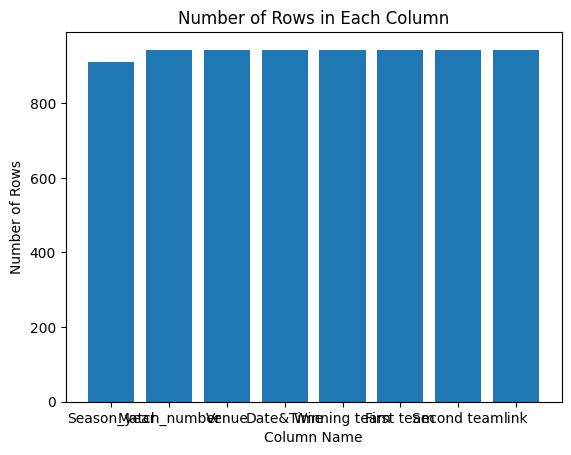

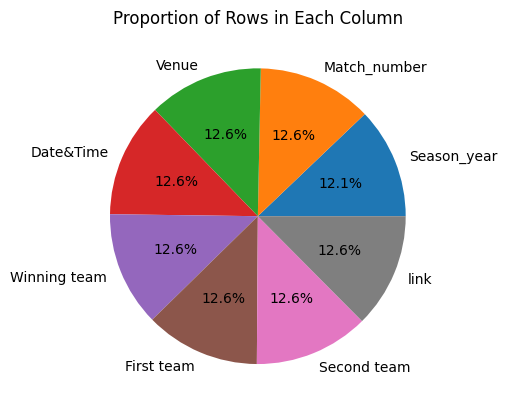

In [ ]:
#counting rows of above csv columns

import matplotlib.pyplot as plt

# Count the number of rows in each column
column_counts = df.count()

# Create a bar chart of the column counts
plt.bar(column_counts.index, column_counts.values)
plt.xlabel("Column Name")
plt.ylabel("Number of Rows")
plt.title("Number of Rows in Each Column")
plt.show()

# Create a pie chart of the column counts
plt.pie(column_counts.values, labels=column_counts.index, autopct="%1.1f%%")
plt.title("Proportion of Rows in Each Column")
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_548\2699880797.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.count(axis=0))


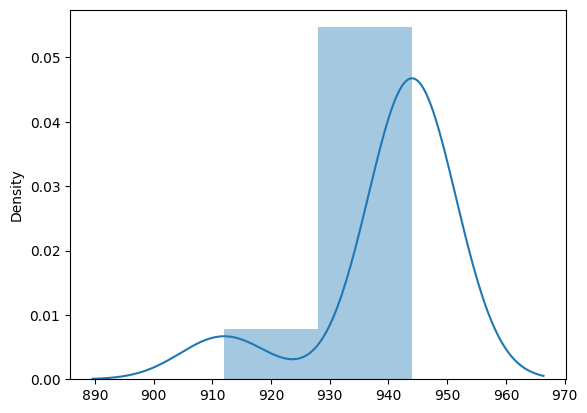

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.count(axis=0))
plt.show()


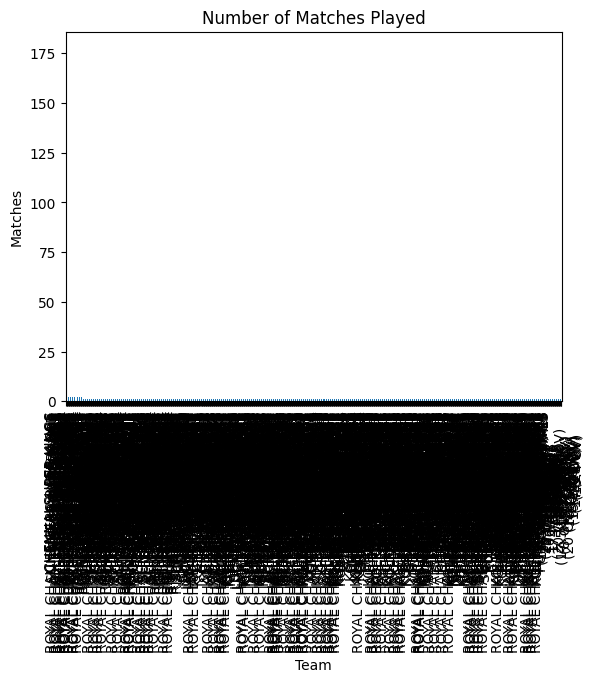

In [ ]:
df['First team'].value_counts().plot(kind='bar')
plt.title('Number of Matches Played')
plt.xlabel('Team')
plt.ylabel('Matches')
plt.show()

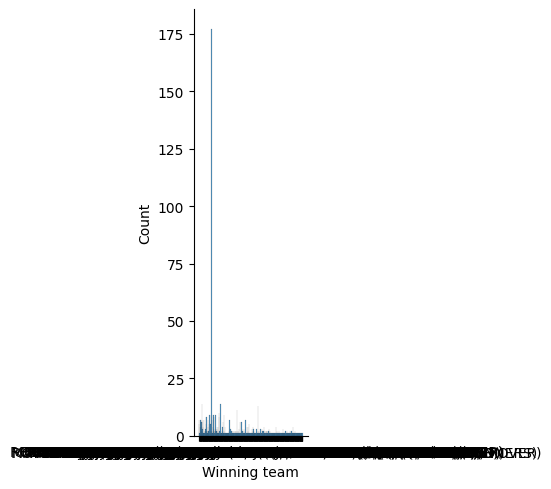

In [ ]:
import seaborn as sns

sns.displot(df, x = "Winning team", kind="hist")